We will start the EDA for Zomato dataset. Starting from the basic analysis we will try to find some hidden insights from the data.


In [1]:
# Importing Libraries for Data Analysis

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objects as px

In [2]:
# Import the Country-Code data file

df_country=pd.read_excel(r"D:\zomato dataset\Country-Code.xlsx")

In [3]:
df_country

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [4]:
# Import the Zomato restaurants data file

df=pd.read_csv(r"D:\zomato dataset\zomato.csv",encoding='latin-1')

In [5]:
df.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [6]:
#Shape of our dataset

df.shape

(9551, 21)

Now lets have a quick look at the data set columns and data types and other basic info about Null values.


In [7]:
# Information about Null values & datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# Display the basic stats for the columns

df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [9]:
# Look at the data set columns.

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
# Total number of null values in our dataset

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Since zomato country code file only has country names and code, it makes sense to merge both the data sets to form a single data set on which it will be easy to work for us.


In [11]:
# Merge both data files zomato Restaurant & country code

zomato = pd.merge(df,df_country, on = 'Country Code')


In [12]:
zomato.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

look at the data set columns and data types and other basic info about Null values.


In [13]:
# Information about Null values & datatypes

zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [14]:
# Total number of duplicate values in our dataset

zomato.duplicated().sum()

0

Data cleaning in our dataset


In [15]:
zomato['Has Online delivery']=zomato['Has Online delivery'].apply(lambda x: '1' if str(x)=='Yes' else '0')
zomato['Has Table booking']=zomato['Has Table booking'].apply(lambda x: '1' if str(x)=='Yes' else '0')


In [16]:
zomato.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                  1   
1                          Japanese  ...                  1   
2  Seafood, Asian, Filipino, Indian  ...                  1   
3                   Japanese, Sushi  ...                  0   
4                  Japanese, Korean  ...                  1   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                   0                No                   No           3   
1                   0                No                   No           3   
2                   0                No                   No           4   
3                   0                No                   No           4   
4                   0                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [17]:
# No. of unique countries & No. of Restaurant listed in data set

zomato.Country.value_counts()


India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [18]:
labels = list(zomato.Country.value_counts().index)
values = list(zomato.Country.value_counts().values)

fig = go.Figure(data = [go.Pie(labels=labels,values=values,rotation=120,hole = 0.5)], 
                layout=go.Layout(title="Zomato's Worldwide Business",))
fig.show()

In [19]:
# No. of Restaurant on zomato in different cities in India

zomato.loc[zomato['Country']=='India'].City.value_counts()


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [20]:
zomato_india = zomato.loc[zomato['Country']=='India']
labels = list(zomato_india.City.value_counts().index)
values = list(zomato_india.City.value_counts().values)

fig = go.Figure(data = [go.Pie(labels=labels,values=values,rotation=120,hole=0.5)],
                layout=go.Layout(title="Zomato's India Business",))
fig.show()

Analysis of Zomato India


In [21]:
zomato_india['Has Online delivery'].value_counts()

0    6229
1    2423
Name: Has Online delivery, dtype: int64

In [22]:
zomato_india['Has Table booking'].value_counts()

0    7541
1    1111
Name: Has Table booking, dtype: int64

In [23]:
zomato_india['Is delivering now'].value_counts()

No     8618
Yes      34
Name: Is delivering now, dtype: int64

In [24]:
zomato_india['Switch to order menu'].value_counts()

No    8652
Name: Switch to order menu, dtype: int64

Now Lets start our analysis and see which top 15 restaurants in the data set have maximum number of outlets


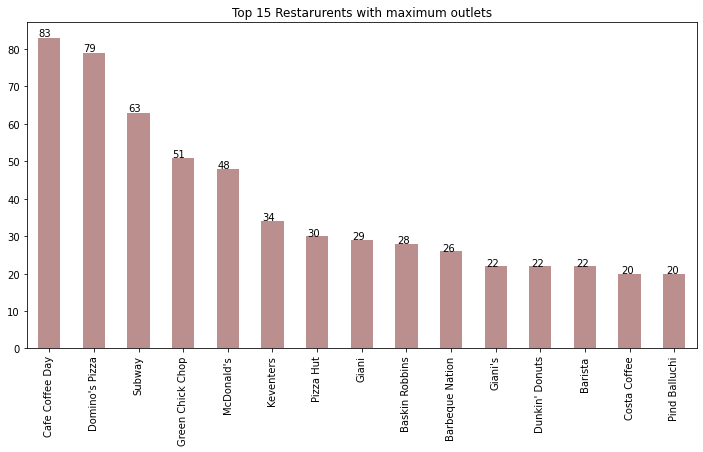

In [25]:
# Top 15 Restaurant with maximum number of outlets

ax=zomato['Restaurant Name'].value_counts().head(15).plot.bar(figsize =(12,6),color="rosybrown")
ax.set_title("Top 15 Restarurents with maximum outlets")
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() * 1.005, i.get_height() * 1.005))



Lets find out top 10 restaurants in the data with highest number of votes.


<AxesSubplot:xlabel='Restaurant Name'>

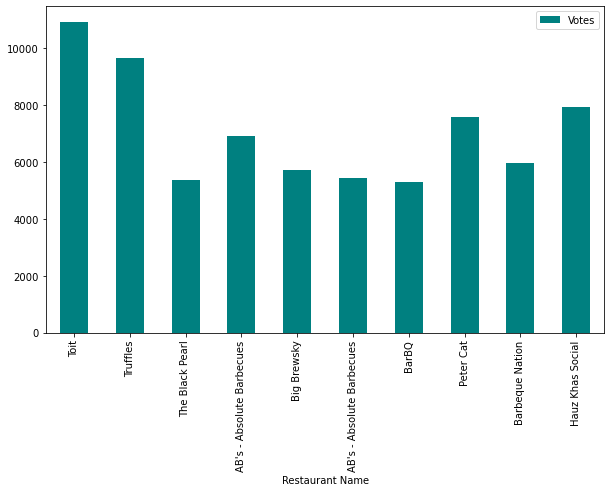

In [26]:
# Top 10 Restaurant with highest no. of votes

max_votes =zomato.Votes.sort_values(ascending=False).head(10)
zomato.loc[zomato['Votes'].isin(max_votes)][['Restaurant Name','Votes']]
zomato.loc[zomato['Votes'].isin(max_votes)][['Restaurant Name','Votes']].plot.bar(x='Restaurant Name', y='Votes',
                                                                                  figsize = (10,6),color="teal")

Lets separate the data for restaurants from India for ease of analysis. If we consider the whole data set, we will have to take into account the currency values for each country. For example while considering 'Average cost for two' on graph the data should be uniform.


In [27]:
zomato_india = zomato.loc[zomato['Country']=='India']

In [28]:
zomato_india.head(5)

Restaurant ID                        Restaurant Name  Country Code  City  \
624        3400025                             Jahanpanah             1  Agra   
625        3400341                    Rangrezz Restaurant             1  Agra   
626        3400005                Time2Eat - Mama Chicken             1  Agra   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
628        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
624  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
625  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
626        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
627  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
628  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

     ...  Has Table booking Has Online delivery Is delivering now  \
624  ...                  0                   0                No   
625  ...                  0                   0                No   
626  ...                  0                   0                No   
627  ...                  0                   0                No   
628  ...                  0                   0                No   

    Switch to order menu Price range Aggregate rating  Rating color  \
624                   No           3              3.9        Yellow   
625                   No           2              3.5        Yellow   
626                   No           2              3.6        Yellow   
627                   No           2              4.0         Green   
628                   No           3              4.2         Green   

     Rating text Votes Country  
624         Good   140   India  
625         Good    71   India  
626         Good    94   India  
627    Very Good    87   India  
628    Very Good   177   India  

[5 rows x 22 columns]

Lets try to find out If there is any relation between average cost for two and aggregate rating of restaurants.


<AxesSubplot:title={'center':'Cost vs Agg Rating'}, xlabel='Average Cost for two', ylabel='Aggregate rating'>

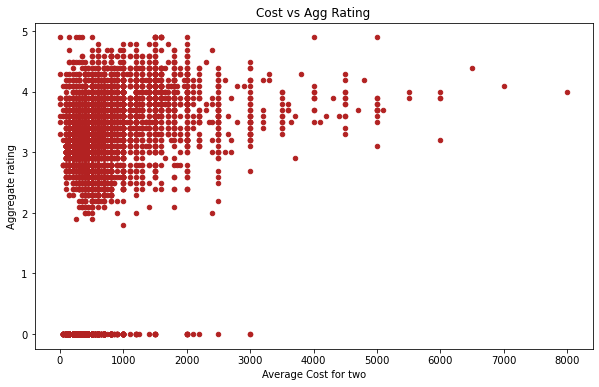

In [29]:
# Is there any relation between average cost for two and aggregate rating of restaurants

zomato_india.plot.scatter(x='Average Cost for two',y='Aggregate rating',figsize=(10,6), 
                                                   color='firebrick', title="Cost vs Agg Rating")


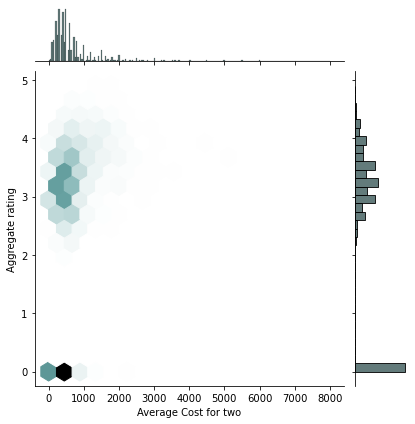

In [30]:
# Better view of relation between average cost for two and aggregate rating of restaurants

sns.jointplot(x='Average Cost for two',y='Aggregate rating',kind ='hex',gridsize=18,data =zomato_india,color='darkslategrey')


Lets see what are the top 10 cuisines served by maximum number of restaurants

(-1.1057505479897058,
 1.1002738356185575,
 -1.1007208411416545,
 1.1102093821713037)

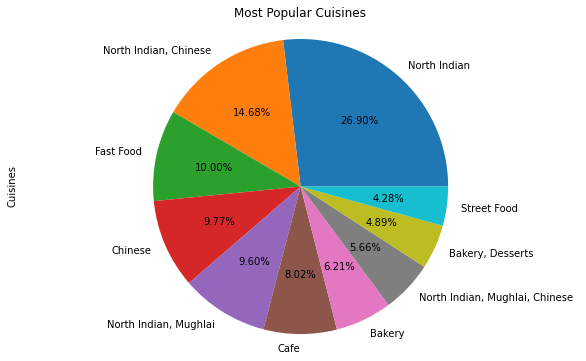

In [31]:
# Top 10 Cuisines served by restaurants

zomato_india['Cuisines'].value_counts().sort_values(ascending=False).head(10)
zomato_india['Cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular Cuisines", autopct='%1.2f%%')
plt.axis('equal')


Next lets try to find out does there exist any correlation among 'avg cost for two', 'price range' and 'agg rating'

<AxesSubplot:>

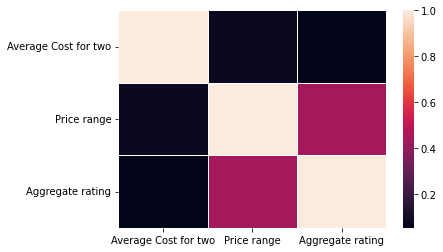

In [32]:
# Correlation among avg cost, price range, agg rating

zomato_corr = zomato[['Average Cost for two', 'Price range', 'Aggregate rating']]
sns.heatmap(zomato_corr.corr(),linewidth=1.0)


Lets try to find out more insights for correlation among 'avg cost for two', 'price range' and 'agg rating' by using pair plot but keeping our data limited to top 5 cities with max restaurants.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



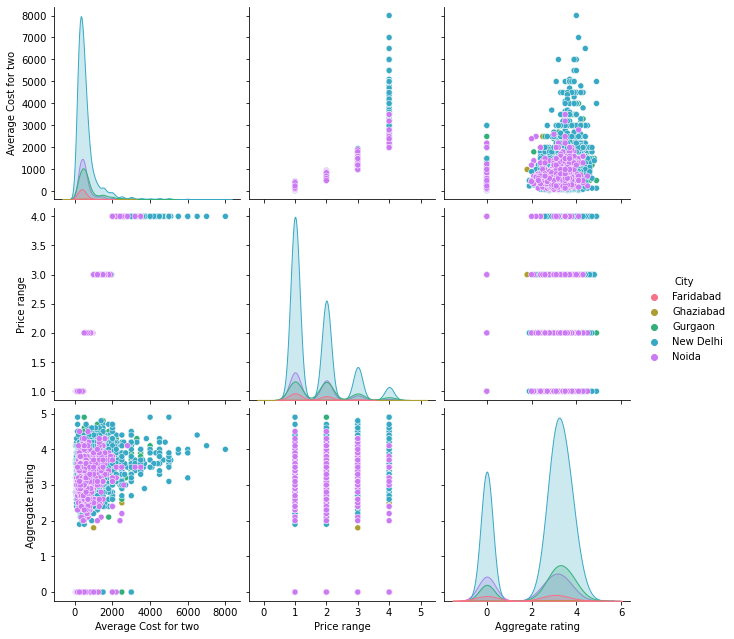

In [33]:
# More insight for correlation by using pair plot keeping top 5 cities with maximum restaurant

top5_indian_cities = ['New Delhi', 'Gurgaon', 'Noida','Faridabad', 'Ghaziabad']
zomato_p = zomato.loc[zomato['City'].isin(top5_indian_cities)]
zomato_pair = zomato_p[['Average Cost for two', 'Price range', 'Aggregate rating', 'City']]
sns.pairplot(zomato_pair, size=3, hue='City', palette="husl")


Next lets try to find out similar relation by keeping our data limited to top 5 cuisines instead of cities.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



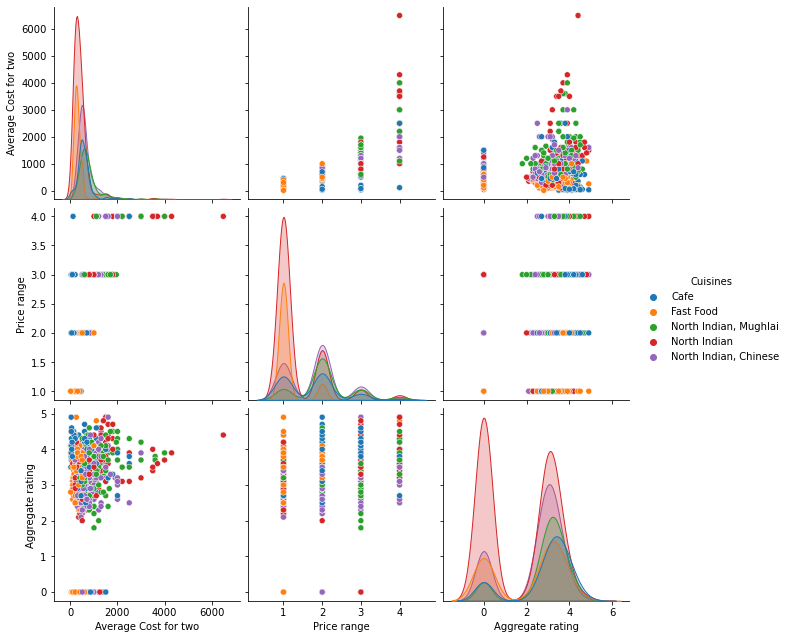

In [34]:
# Correlation of cost, price range with top 5 cuisines

top5cuisines_list=['North Indian', 'North Indian, Chinese', 'Fast Food', 'North Indian, Mughlai', 'Cafe']

zomato_cuisines = zomato.loc[zomato['Cuisines'].isin(top5cuisines_list)]
zomato_cuisines_data = zomato_cuisines[['Average Cost for two', 'Price range', 'Aggregate rating', 'Cuisines']]
sns.pairplot(zomato_cuisines_data, size=3, hue='Cuisines')


Now lets analyze top 10 cuisines with 'price range' and 'agg rating' and look at our findings.

Text(0.5, 1.0, 'Analysis of Top10 Cuisines with price range and Agg. rating ')

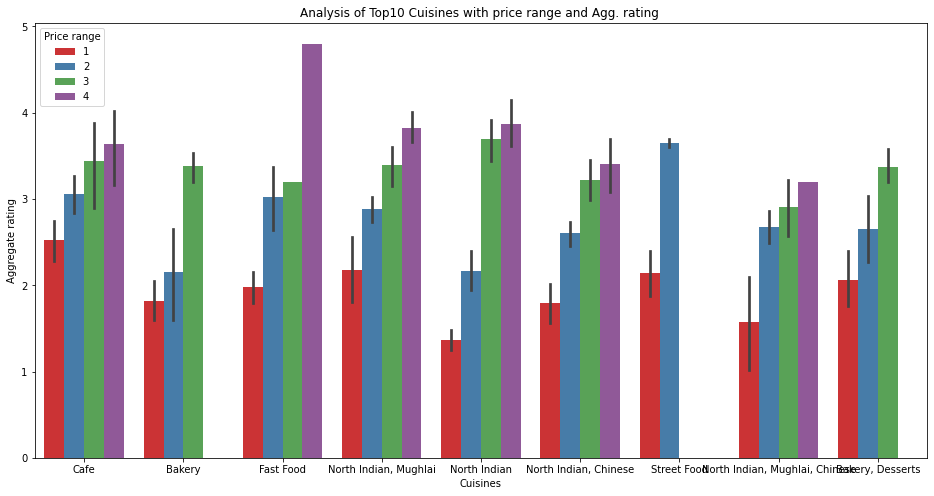

In [35]:
# ANalysis of top 10 cuisines with price range and agg rating

top10cuisines_list=['North Indian', 'North Indian, Chinese', 'Fast Food', 'North Indian, Mughlai', 'Cafe', 'Bakery',
                   'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food' ]
zomato_cuisines = zomato.loc[zomato['Cuisines'].isin(top10cuisines_list)]
zomato_cuisines_data = zomato_cuisines[['Average Cost for two', 'Price range', 'Aggregate rating', 'Cuisines']]

fig, axx =plt.subplots(figsize=(16,8))
sns.barplot(x='Cuisines', y='Aggregate rating', hue='Price range', data=zomato_cuisines_data, palette="Set1")
axx.set_title("Analysis of Top10 Cuisines with price range and Agg. rating ")


<AxesSubplot:xlabel='Cuisines', ylabel='Aggregate rating'>

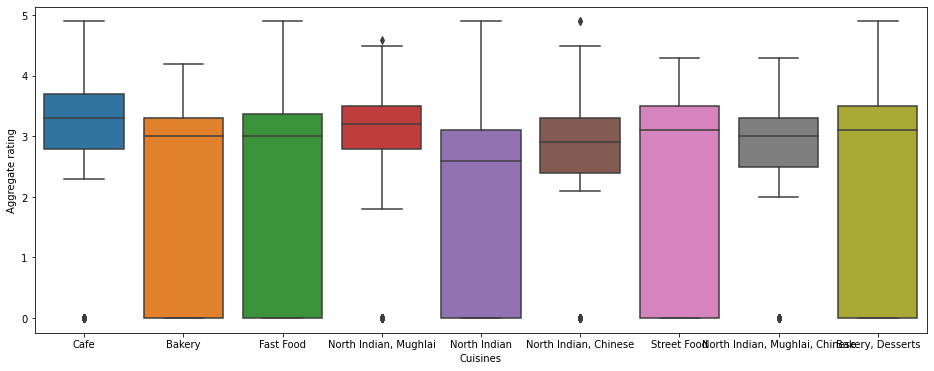

In [36]:
# Most common agg. rating for each type of cuisine

top10cuisines_list=['North Indian', 'North Indian, Chinese', 'Fast Food', 'North Indian, Mughlai', 'Cafe', 'Bakery',
                   'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food' ]
zomato_cuisines = zomato.loc[zomato['Cuisines'].isin(top10cuisines_list)]
zomato_cuisines_data = zomato_cuisines[['Average Cost for two', 'Price range', 'Aggregate rating', 'Cuisines']]
fig, axx =plt.subplots(figsize=(16,6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=zomato_cuisines_data)


Now lets find out percentage rating of restaurants in our top 5 cities and then plot it on a graph and make some findings.

Percentage rating means what percentage of restaurants in a city are Excellent, average etc.


In [37]:
# Restaurant Percentage wise rating in top 5 cities

top5_indian_cities = ['New Delhi', 'Gurgaon', 'Noida','Faridabad', 'Ghaziabad']
zomato_rate = zomato.loc[zomato['City'].isin(top5_indian_cities)]


# Find total number of restaurants

total_restro = zomato_rate.groupby(['City'], as_index=False).count()[['City','Restaurant ID']]
total_restro.columns=['City','Total Restaurants']


# Find total rating count of each type

top5rest = zomato_rate.groupby(['City','Rating text'], as_index=False)[['Restaurant Name']].count()
top5rest.columns=['City','Rating Text', 'Total Ratings']


# Merge both the dataframes and calculate percentage

top5restro_rating_percent = pd.merge(total_restro, top5rest, on='City')
top5restro_rating_percent['Percentage']= (top5restro_rating_percent['Total Ratings']/
                                       top5restro_rating_percent['Total Restaurants'])*100

top5restro_rating_percent


City  Total Restaurants Rating Text  Total Ratings  Percentage
0   Faridabad                251     Average            123   49.003984
1   Faridabad                251   Excellent              1    0.398406
2   Faridabad                251        Good             22    8.764940
3   Faridabad                251   Not rated            100   39.840637
4   Faridabad                251        Poor              2    0.796813
5   Faridabad                251   Very Good              3    1.195219
6   Ghaziabad                 25     Average             18   72.000000
7   Ghaziabad                 25        Good              4   16.000000
8   Ghaziabad                 25   Not rated              2    8.000000
9   Ghaziabad                 25        Poor              1    4.000000
10    Gurgaon               1118     Average            504   45.080501
11    Gurgaon               1118   Excellent             12    1.073345
12    Gurgaon               1118        Good            257   22.987478
13    Gurgaon               1118   Not rated            228   20.393560
14    Gurgaon               1118        Poor             34    3.041145
15    Gurgaon               1118   Very Good             83    7.423971
16  New Delhi               5473     Average           2495   45.587429
17  New Delhi               5473   Excellent             28    0.511602
18  New Delhi               5473        Good           1128   20.610269
19  New Delhi               5473   Not rated           1425   26.036908
20  New Delhi               5473        Poor             97    1.772337
21  New Delhi               5473   Very Good            300    5.481454
22      Noida               1080     Average            449   41.574074
23      Noida               1080   Excellent              2    0.185185
24      Noida               1080        Good            173   16.018519
25      Noida               1080   Not rated            384   35.555556
26      Noida               1080        Poor             45    4.166667
27      Noida               1080   Very Good             27    2.500000

Now lets plot the above data in the form of a graph and list our findings.

<AxesSubplot:title={'center':'Percentage Rating of Restaurants in Top 5 Cities'}, xlabel='City', ylabel='Percentage'>

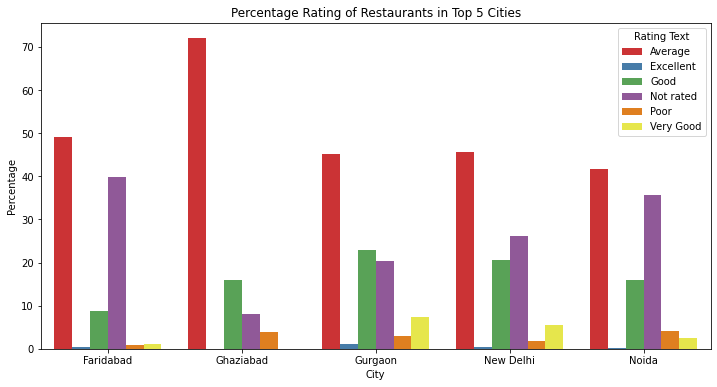

In [38]:
# Plot Rating percentage of restaurants in top 5 cities

fig, axx =plt.subplots(figsize=(12,6))
axx.set_title("Percentage Rating of Restaurants in Top 5 Cities")
sns.barplot(x='City', y='Percentage',hue='Rating Text', data=top5restro_rating_percent, palette='Set1')


Lets try to find out more insights for correlation among 'avg cost for two', 'price range' and 'agg rating' by using pair plot but keeping our data limited to top 3 cities with max restaurants in Gujarat.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



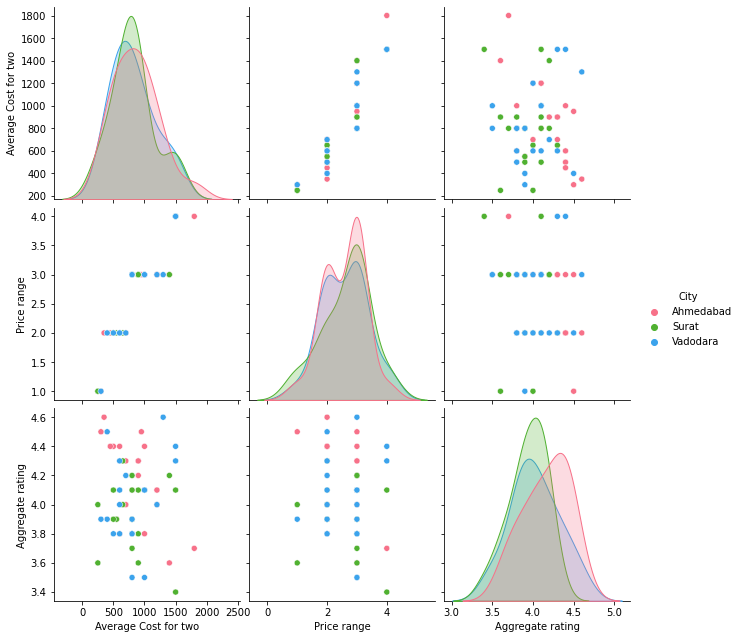

In [39]:
# More insight for correlation by using pair plot keeping top 3 cities with maximum restaurant in Gujarat

top3_cities = ['Ahmedabad', 'Surat', 'Vadodara']
zomato_p = zomato.loc[zomato['City'].isin(top3_cities)]
zomato_pair = zomato_p[['Average Cost for two', 'Price range', 'Aggregate rating', 'City']]
sns.pairplot(zomato_pair, size=3, hue='City', palette="husl")


Now Lets start our analysis of Vadodara city of Gujarat.

In [40]:
zomato_vadodara = zomato.loc[zomato['City']=='Vadodara']

In [41]:
zomato_vadodara

Restaurant ID                    Restaurant Name  Country Code  \
9216        3200090                      22nd Parallel             1   
9217        3200440                      Kabir Kitchen             1   
9218       18295781                       Kaphi Pibama             1   
9219        3200265                           VarieTea             1   
9220        3200012                    Barbeque Nation             1   
9221        3200005                       Little Italy             1   
9222       18275708                             Meraki             1   
9223        3200021                         That Place             1   
9224        3200584                        Wok On Fire             1   
9225        3200015      Mandap - Hotel Express Towers             1   
9226        3200032                     Offside Lounge             1   
9227        3200002           Gazebo Garden Restaurant             1   
9228        3200311  La Quello - Mediterranean Kitchen             1   
9229        3200497                  El Amigos Kitchen             1   
9230        3200560                        Mr Toasties             1   
9231        3200269                  The Yellow Chilli             1   
9232        3200590                     Coffee Culture             1   
9233        3200537         Freshco - The Health Cafí©             1   
9234        3200024                          Pizza Hut             1   
9235        3200034                           Tomato's             1   

          City                                            Address  \
9216  Vadodara  1st Floor, Tapan Complex, Next To M Cube Mall,...   
9217  Vadodara  R.C. Dutt Road,Opposite Concord Building, Alka...   
9218  Vadodara  18-A, Nutan Bharat, Soc 002-Yogeshwar Apartmen...   
9219  Vadodara  83/A, Alkapuri Society, Near Baroda High Schoo...   
9220  Vadodara  3rd Floor, Shreem Shalini Mall, R.C. Dutt Road...   
9221  Vadodara  36, Alkapuri Society, Behind HDFC Bank, Alkapu...   
9222  Vadodara  Opposite Kunj Society, Near Nilkanthvarni Jewe...   
9223  Vadodara           33, Sampatrao Colony, Alkapuri, Vadodara   
9224  Vadodara  1, Olive Complex, Opposite ABS Tower, B/S ICIC...   
9225  Vadodara  Hotel Express Towers, R.C. Dutt Road, Alkapuri...   
9226  Vadodara  1st Floor, Kanchanganga Apartments, Near Bird ...   
9227  Vadodara  Opposite FGI, Near Iscon Harmony, Sevasi-Bhimp...   
9228  Vadodara  1, Trivia, Natu Bhai Circle, Race Course Road,...   
9229  Vadodara  Ground Floor, Prestige Building, Race Course R...   
9230  Vadodara  2/8 MIG Flats, Opposite Indraprastha Complex, ...   
9231  Vadodara  2nd Floor, 1-7, Sharnam Fortune, Opposite Inox...   
9232  Vadodara  1-8, Opposite INOX Multiplex, Sharnam Fortune,...   
9233  Vadodara  Shop 2-3, Ground Floor, Opposite Natubhai Circ...   
9234  Vadodara  51,Akashganga Complex,Race Course Road, Vadiwa...   
9235  Vadodara  1st Floor, Aditi Plaza, Beside IDBI Bank, Race...   

                            Locality  \
9216                        Alkapuri   
9217                        Alkapuri   
9218                        Alkapuri   
9219                        Alkapuri   
9220                        Alkapuri   
9221                        Alkapuri   
9222                        Alkapuri   
9223                        Alkapuri   
9224                      Diwalipura   
9225  Hotel Express Towers, Alkapuri   
9226           M Cube Mall, Vadiwadi   
9227                       Panchvati   
9228                        Vadiwadi   
9229                        Vadiwadi   
9230                        Vadiwadi   
9231                        Vadiwadi   
9232                        Vadiwadi   
9233                        Vadiwadi   
9234                        Vadiwadi   
9235                        Vadiwadi   

                              Locality Verbose  Longitude   Latitude  \
9216                        Alkapuri, Vadodara  73.167788  22.307898   
9217                        Alkapuri, Vadodara   0.000000 

Lets try to find out If there is any relation between average cost for two and aggregate rating of restaurants.


<AxesSubplot:title={'center':'Cost vs Agg Rating'}, xlabel='Average Cost for two', ylabel='Aggregate rating'>

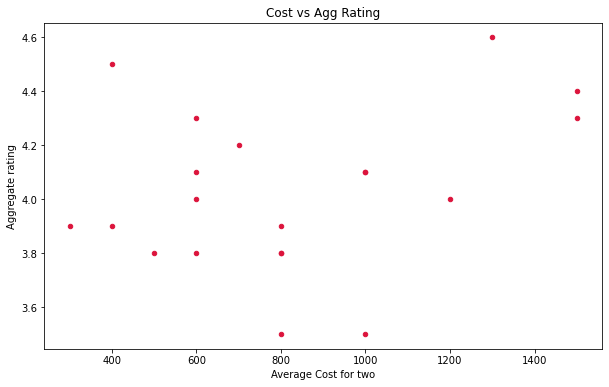

In [42]:
# Is there any relation between average cost for two and aggregate rating of restaurants

zomato_vadodara.plot.scatter(x='Average Cost for two',y='Aggregate rating',figsize=(10,6), 
                                                   color='crimson', title="Cost vs Agg Rating")


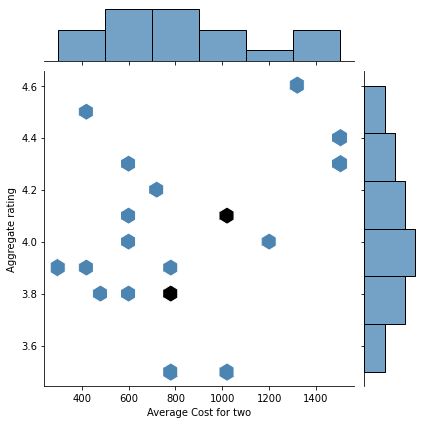

In [43]:
# Better view of relation between average cost for two and aggregate rating of restaurants

sns.jointplot(x='Average Cost for two',y='Aggregate rating',kind ='hex',gridsize=20,data =zomato_vadodara,color='steelblue')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



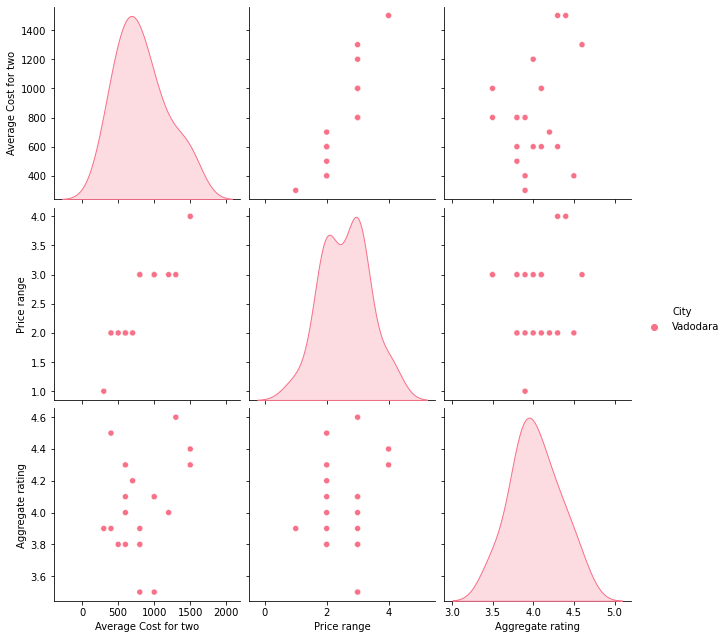

In [44]:
# More insight for correlation by using pair plot keeping with maximum restaurant in Vadodara City

v_city = ['Vadodara']
zomato_v = zomato.loc[zomato['City'].isin(v_city)]
zomato_vpair = zomato_v[['Average Cost for two', 'Price range', 'Aggregate rating', 'City']]
sns.pairplot(zomato_vpair, size=3, hue='City', palette="husl")


Lets see what are the cuisinesn served by maximum number of restaurants in vadodara city.

(-1.100000002820261, 1.10000000527266, -1.100000003923841, 1.100000001471441)

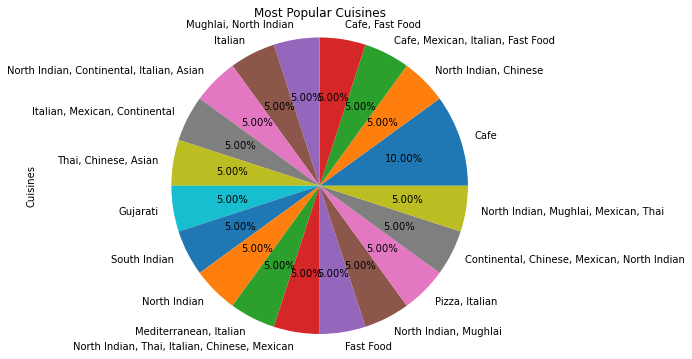

In [45]:
# Cuisines served by restaurants in vadodara city

zomato_vadodara['Cuisines'].value_counts().sort_values(ascending=False)
zomato_vadodara['Cuisines'].value_counts().sort_values(ascending=False).plot(kind='pie',figsize=(10,6), 
title="Most Popular Cuisines", autopct='%1.2f%%')
plt.axis('equal')


Now lets find out percentage rating of restaurants in Vadodara city and then plot it on a graph and make some findings.

Percentage rating means what percentage of restaurants in a city are Excellent, average etc.


In [46]:
# Restaurant Percentage wise rating in Vadodara

vadodara_city = ['Vadodara']
zomato_rate = zomato.loc[zomato['City'].isin(vadodara_city)]


# Find total number of restaurants

total_restro = zomato_rate.groupby(['City'], as_index=False).count()[['City','Restaurant ID']]
total_restro.columns=['City','Total Restaurants']


# Find total rating count of each type

restro_rate = zomato_rate.groupby(['City','Rating text'], as_index=False)[['Restaurant Name']].count()
restro_rate.columns=['City','Rating Text', 'Total Ratings']


# Merge both the dataframes and calculate percentage

restro_rating_percent = pd.merge(total_restro,restro_rate, on='City')
restro_rating_percent['Percentage']= (restro_rating_percent['Total Ratings']/
                                    restro_rating_percent['Total Restaurants'])*100

restro_rating_percent


City  Total Restaurants Rating Text  Total Ratings  Percentage
0  Vadodara                 20   Excellent              2        10.0
1  Vadodara                 20        Good              9        45.0
2  Vadodara                 20   Very Good              9        45.0

Now lets plot the above data in the form of a graph and list our findings.

<AxesSubplot:title={'center':'Percentage Rating of Restaurants in Vadodara City'}, xlabel='City', ylabel='Percentage'>

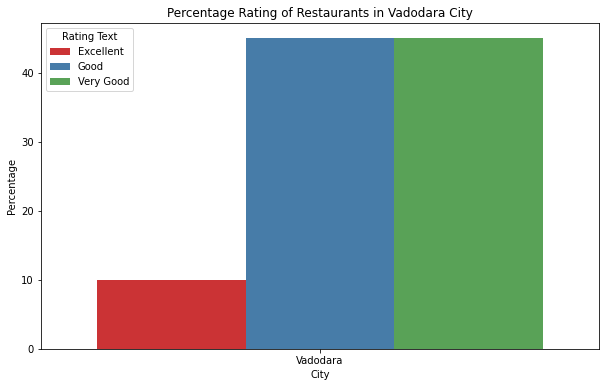

In [47]:
# Plot Rating percentage of restaurants in Vadodara City

fig, axx =plt.subplots(figsize=(10,6))
axx.set_title("Percentage Rating of Restaurants in Vadodara City")
sns.barplot(x='City', y='Percentage',hue='Rating Text', data=restro_rating_percent, palette='Set1')
